## GPS Data Plotting and Measurements

In [1]:
import ipynb.fs.full.helper as hp
# For reading the data
import pandas as pd
import os
import numpy as np
import math

# General plotting commands
from matplotlib.path import Path
import matplotlib.pyplot as plt

# pip install numpy --upgradea
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen
from cartopy.io.img_tiles import GoogleTiles

In [2]:
df = pd.read_hdf("~/data/DesertDataOct/Run02/Interpolated_0.h5") #load_GPS_directory_to_pandas('.')
df


,master_time,odor,trisonica_U,trisonica_V,lat,lon
0,1.603221e+09,0.634854,0.280000,1.160000,40.793749,-119.157556
1,1.603221e+09,0.635494,0.289993,1.160000,40.793749,-119.157556
2,1.603221e+09,0.635827,0.299985,1.160000,40.793749,-119.157556
3,1.603221e+09,0.635718,0.309978,1.160000,40.793749,-119.157556
4,1.603221e+09,0.635305,0.319970,1.160000,40.793749,-119.157556
...,...,...,...,...,...,...
59757,1.603221e+09,0.591438,1.333149,-1.755375,40.793697,-119.157631
59758,1.603221e+09,0.589259,1.496149,-1.733239,40.793697,-119.157631
59759,1.603221e+09,0.589552,1.331477,-1.796238,40.793697,-119.157631
59760,1.603221e+09,0.590273,1.110641,-1.873829,40.793697,-119.157631


Text(0, 0.5, 'Latitude')

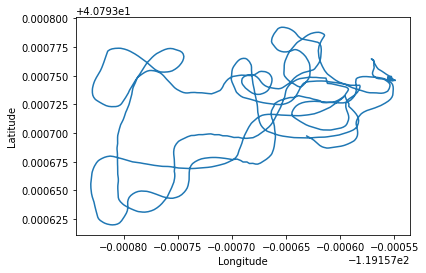

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(df.lon, df.lat)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [4]:
mean_latitude = df.lat.mean()
mean_longitude= df.lon.mean()
minValueLong = df.lon.min()
maxValueLong = df.lon.max()
minValueLat = df.lat.min()
maxValueLat = df.lat.max()
print("meanLatitude:%.6f" %mean_latitude)
print("meanLongitude:%.6f" %mean_longitude)
print("minvaluelong:%.6f" %minValueLong)
print("maxvaluelong:%.6f" %maxValueLong)
print("minvaluelat:%.6f" %minValueLat)
print("maxvaluelat:%.6f" %maxValueLat)

meanLatitude:40.793729
meanLongitude:-119.157649
minvaluelong:-119.157830
maxvaluelong:-119.157549
minvaluelat:40.793620
maxvaluelat:40.793792


In [ ]:
# Terrain Tiles from Stamen

# Define image tiles
tiler = Stamen('terrain')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.1570, -119.1580, 40.7925, 40.7940],crs=ccrs.PlateCarree())

# Download images with resolution
resolution =12
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df.lon, df.lat, c= df.lon, cmap='magma', transform=ccrs.PlateCarree())

In [ ]:
# Satellite Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='satellite')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.8204, 39.6760, -119.8208, 39.6770],crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 18
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df["field.longitude"], df["field.latitude"], c=df["field.longitude"], cmap='magma', transform=ccrs.PlateCarree())

In [ ]:
# Street Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='street')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.82060, -119.8208, 39.67650, 39.67690], crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 18
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df["field.longitude"], df["field.latitude"], c=df["field.longitude"], cmap='magma', transform=ccrs.PlateCarree())

### Measuring Distance

In [ ]:
def calculate_dst(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 * 1000 # meters

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) **2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [ ]:
#10cm
lat1 = 39.5394048; lat2 = 39.5394114; long1 = -119.8130651; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

In [6]:
from geopy import distance

coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.distance(coords_1, coords_2).m)

0.042124771529315624


In [ ]:
#5cm
lat1 = 39.5394067; lat2 = 39.5394074; long1 = -119.8130486; long2 = -119.8130529
print(calculate_dst((lat1, long1), (lat2, long2)) )

In [ ]:
#2cm
lat1 = 39.5394021; lat2 = 39.5394045; long1 = -119.813052; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

In [ ]:
#1cm
lat1 = 39.5393945; lat2 = 39.539392; long1 = -119.8130723; long2 = -119.8130765
print( calculate_dst((lat1, long1), (lat2, long2)) )

In [ ]:
from geopy import distance

coords_1 = (39.54644600, -119.81473767)
coords_2 = (39.54646483, -119.81476417)

print (distance.distance(coords_1, coords_2).m)

In [ ]:
lat1 = 39.54644600; lat2 = 39.54646483; long1 = -119.81473767; long2 = -119.81476417
print( calculate_dst((lat1, long1), (lat2, long2)) )

The great-circle distance or orthodromic distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (as opposed to a straight line through the sphere's interior). The distance between two points in Euclidean space is the length of a straight line between them, but on the sphere there are no straight lines. In spaces with curvature, straight lines are replaced by geodesics. Geodesics on the sphere are circles on the sphere whose centers coincide with the center of the sphere, and are called great circles : https://en.wikipedia.org/wiki/Great-circle_distance

In [5]:
#12.7cm
from geopy import distance
coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.geodesic(coords_1, coords_2).meters)

0.042124771529315624


In [7]:
#2inches ; 5cm
from geopy import distance
coords_1 = (39.539656, -119.8123641)
coords_2 = (39.5396561, -119.8123645)

print (distance.geodesic(coords_1, coords_2).meters)

0.03613379419579837


In [9]:
#1 feet ; 0.3048 meters ; 30.48cm

from geopy import distance
coords_1 = (39.5396559, -119.8123646)
coords_2 = (39.5396561, -119.8123642)

print (distance.geodesic(coords_1, coords_2).meters*100)

4.0932296542144


In [10]:
#4 feet; 1.2192 meters ; 121.92
from geopy import distance
coords_1 = (39.5396561, -119.8123641)
coords_2 = (39.5396561, -119.8123643)

print (distance.geodesic(coords_1, coords_2).meters)

0.01719290415275028


In [ ]:
#3 inches ; 0.0762 meters; 7.62cm

from geopy import distance
coords_1 = (39.5471637, -119.8156282)
coords_2 = (39.547164, -119.8156271)

print (distance.geodesic(coords_1, coords_2).meters)

In [ ]:
#5 inches; 0.127 meters; 12.7 cm

from geopy import distance
coords_1 = (39.547163, -119.8156307)
coords_2 = (39.5471638, -119.8156288)

print (distance.geodesic((39.547163, -119.8156307), coords_2).meters)

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1- a)))
   return res*1000

In [ ]:
haversine_distance(39.547163, -119.8156307, 39.5471638, -119.8156288)